<a href="https://colab.research.google.com/github/Joselyn2114/Assign02-LogisticRegression/blob/main/Regresi%C3%B3n_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Elaborado por:
- Priscilla Jiménez Salgado
- Fabián Araya Ortega
- David Acuña López

# A. Lectura del Dataset

In [38]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("winequality-red.csv")
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Información general del dataset

Se trata de un dataset sobre el vino portugués “Vinho Verde” (variante tinta), donde se recopilan datos de laboratorio (propiedades fisicoquímicas: acidez, pH, alcohol, etc.) y evaluaciones sensoriales (calidad percibida por catadores).

Se analizará la información general mediante estadísticas descriptivas, histogramas, boxplots para observar la distribución de los datos numéricos.

Para obtener primeramente la estructura general del dataset utilizamos df.info(), lo cual retorna un resumen con:
- Número de filas
- Lista de las columnas y el tipo de dato
- Los valores no nulos

In [39]:
# Ver información general del dataset
print(" Información del dataset:")
df.info()

 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Después de ver la estructura del dataset, usamos df.describe() para obtener un resumen de los números. Esta tabla nos ayuda a entender mejor los datos antes de graficarlos o entrenar un modelo.

- Count (conteo): muestra cuántos valores tiene cada columna. Si el número es menor que el total de filas, significa que hay datos faltantes que tal vez debamos rellenar o eliminar.

- Mean y std (promedio y variación): nos dicen cuál es el valor típico y qué tanto cambian los datos. Si la variación es muy grande, puede que necesitemos normalizar o revisar si hay valores raros.

- Min y Max (mínimo y máximo): permiten ver los límites. Si un valor máximo es demasiado alto comparado con el resto, puede ser un error o un outlier.

- Percentiles (25%, 50% o mediana, y 75%): muestran cómo se reparten los datos. Si la mediana es muy diferente al promedio, significa que los datos están sesgados.

*** En resumen: con esta información podemos decidir si el dataset está limpio o si necesita ajustes (tratar datos faltantes, normalizar valores, o revisar outliers). Es un paso clave para asegurarnos de que el análisis y los modelos que hagamos después sean confiables.

In [40]:
# Ver duplicados
print("\n Lectura de faltantes")
display(df.isna().sum())
print("\n Lectura de duplicados:")
display(df.duplicated().sum())


 Lectura de faltantes


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


 Lectura de duplicados:


np.int64(240)

In [41]:
#Limpieza del Dataset : Elimina duplicados
df = df.drop_duplicates()

In [42]:
# Ver estadísticas descriptivas
print("\n Estadísticas descriptivas:")
display(df.describe())


 Estadísticas descriptivas:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Interpretación de las estadísticas descriptivas

Completitud: todas las variables tienen 1,599 valores → no hay datos faltantes.

Acidez fija (g/dm³): media≈8.32, mediana=7.90 (IQR 7.10–9.20). Rango 4.6–15.9. Distribución algo extendida por la derecha: hay pocos vinos muy ácidos (>13) que podrían ser atípicos pero plausibles.

Acidez volátil (ác. acético): media≈0.528, mediana=0.52 (IQR 0.39–0.64), máx=1.58. Cola derecha marcada; valores altos suelen relacionarse con aromas avinados y suelen penalizar la calidad.

Ácido cítrico: media≈0.271, mediana=0.26 (IQR 0.09–0.42), mín=0, máx=1.0. Variación moderada; presencia de ceros indica vinos sin aporte apreciable de cítrico.

Azúcar residual (g/dm³): media≈2.54, mediana=2.20 (IQR 1.90–2.60), máx=15.5. La mayoría son secos; unos pocos más dulces explican la cola derecha.

Cloruros (salinidad): media≈0.087, mediana=0.079 (IQR 0.070–0.090), máx=0.611. Distribución muy sesgada a la derecha; los valores altos podrían ser outliers o lotes con salinidad elevada.

SO₂ libre (mg/dm³): media≈15.9, mediana=14 (IQR 7–21), máx=72. Variabilidad notable (std≈10.46), con algunos vinos marcadamente sulfitados.

SO₂ total (mg/dm³): media≈46.5, mediana=38 (IQR 22–62), máx=289. Cola derecha fuerte; los picos altos merecen revisión (posibles outliers o prácticas de estabilización).

Densidad: media≈0.99675, mediana≈0.99675, rango 0.99007–1.00369. Valores coherentes con vinos secos; las densidades altas podrían asociarse a mayor azúcar residual.

pH: media≈3.31, mediana=3.31, rango 2.74–4.01. Intervalo típico de vinos tintos; baja dispersión.

Sulfitos (sulfatos): media≈0.658, mediana=0.62 (IQR 0.55–0.73), máx=2.0. Algunos valores altos (posibles atípicos); pueden incrementar sensación amarga/astrigente.

Alcohol (% vol): media≈10.42, mediana=10.2 (IQR 9.5–11.1), rango 8.4–14.9. Ligera cola derecha hacia vinos más alcohólicos.

Calidad (0–10): media≈5.64, mediana=6 (IQR 5–6), rango 3–8. Concentración en calificaciones medias; pocos vinos excelentes. Ligera asimetría a la izquierda (media < mediana).

---
# B. Análisis de Características

En esta sección realizamos un EDA para entender la forma y relaciones de las variables


1) Distribución y posibles outliers de variables clave
Se busca identificar colas largas y valores extremos que podrían afectar los modelos.



C:\Users\USUARIO\AppData\Local\Temp\ipykernel_21312\1686106664.py:15: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout(); plt.show()
C:\Users\USUARIO\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


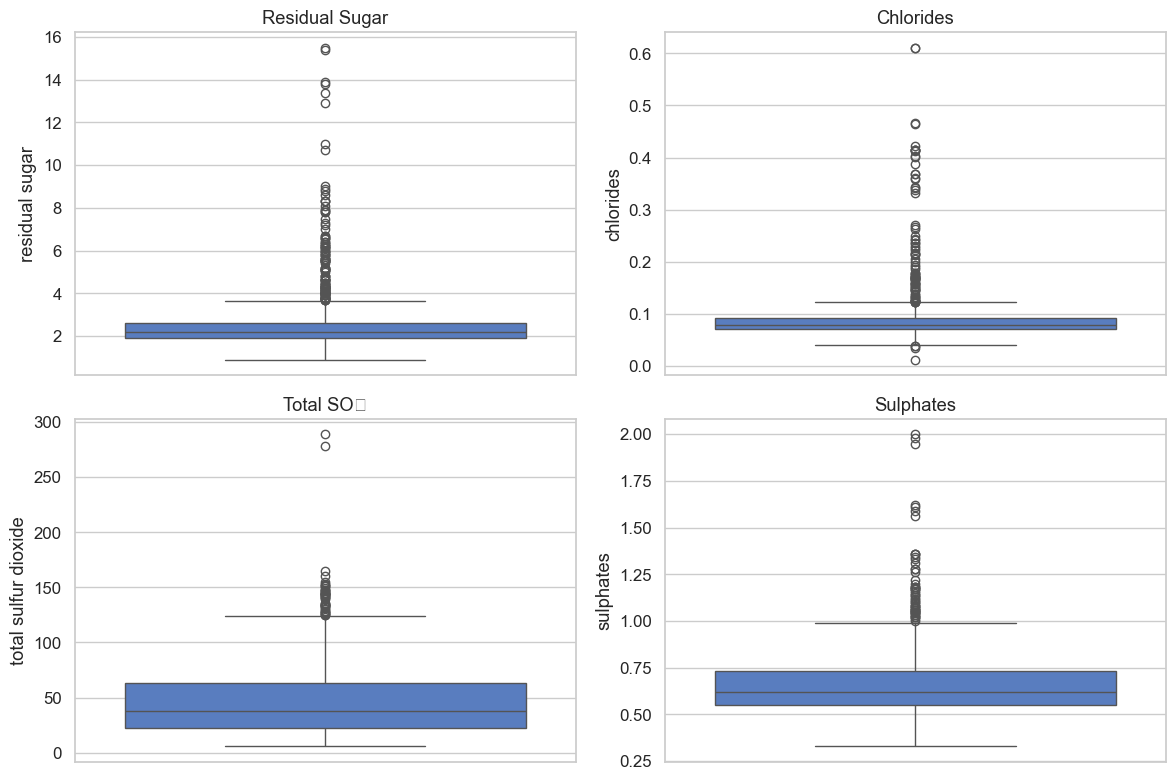

In [43]:
# === Análisis de Características ===

# Ajustes generales
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# -----------------------------------
print("\n1) Distribución y posibles outliers de variables clave")
print("Se busca identificar colas largas y valores extremos que podrían afectar los modelos.\n")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(data=df, y="residual sugar", ax=axes[0,0]); axes[0,0].set_title("Residual Sugar")
sns.boxplot(data=df, y="chlorides", ax=axes[0,1]); axes[0,1].set_title("Chlorides")
sns.boxplot(data=df, y="total sulfur dioxide", ax=axes[1,0]); axes[1,0].set_title("Total SO₂")
sns.boxplot(data=df, y="sulphates", ax=axes[1,1]); axes[1,1].set_title("Sulphates")
plt.tight_layout(); plt.show()



2) Correlaciones entre variables
Se buscan variables muy correlacionadas (colinealidad) y las que más se relacionan con quality.



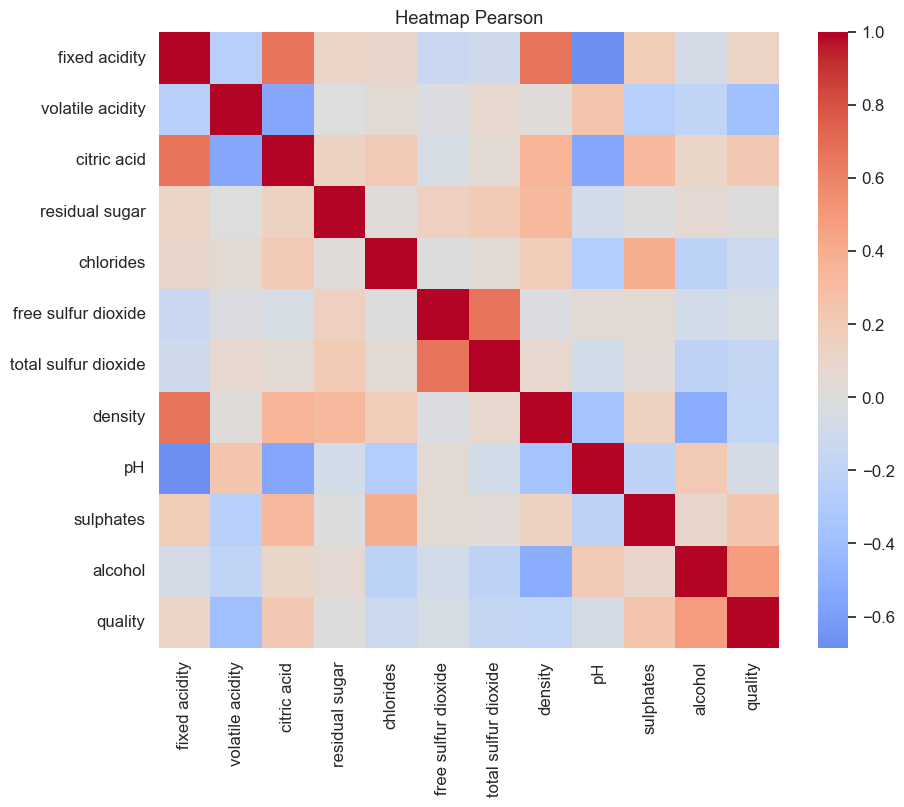

In [44]:
# -----------------------------------
print("\n2) Correlaciones entre variables")
print("Se buscan variables muy correlacionadas (colinealidad) y las que más se relacionan con quality.\n")

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm", center=0)
plt.title("Heatmap Pearson"); plt.show()


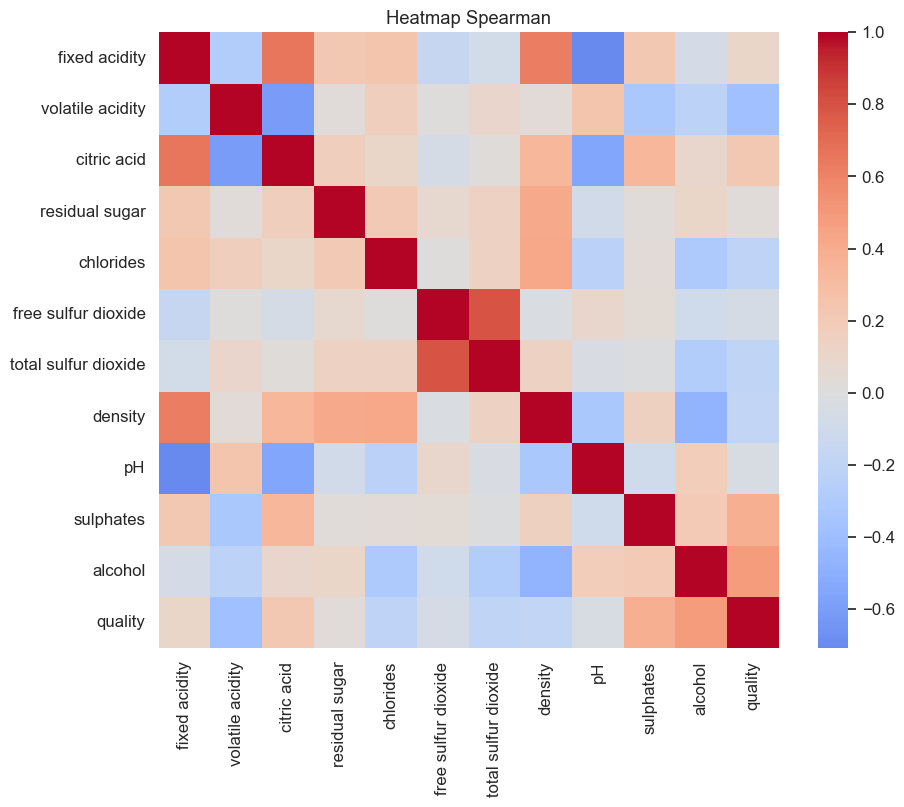

In [45]:

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(method="spearman", numeric_only=True), annot=False, cmap="coolwarm", center=0)
plt.title("Heatmap Spearman"); plt.show()


3) Scatterplots de consistencia interna
Se espera relación negativa alcohol-density, positiva sugar-density, y relación con quality.



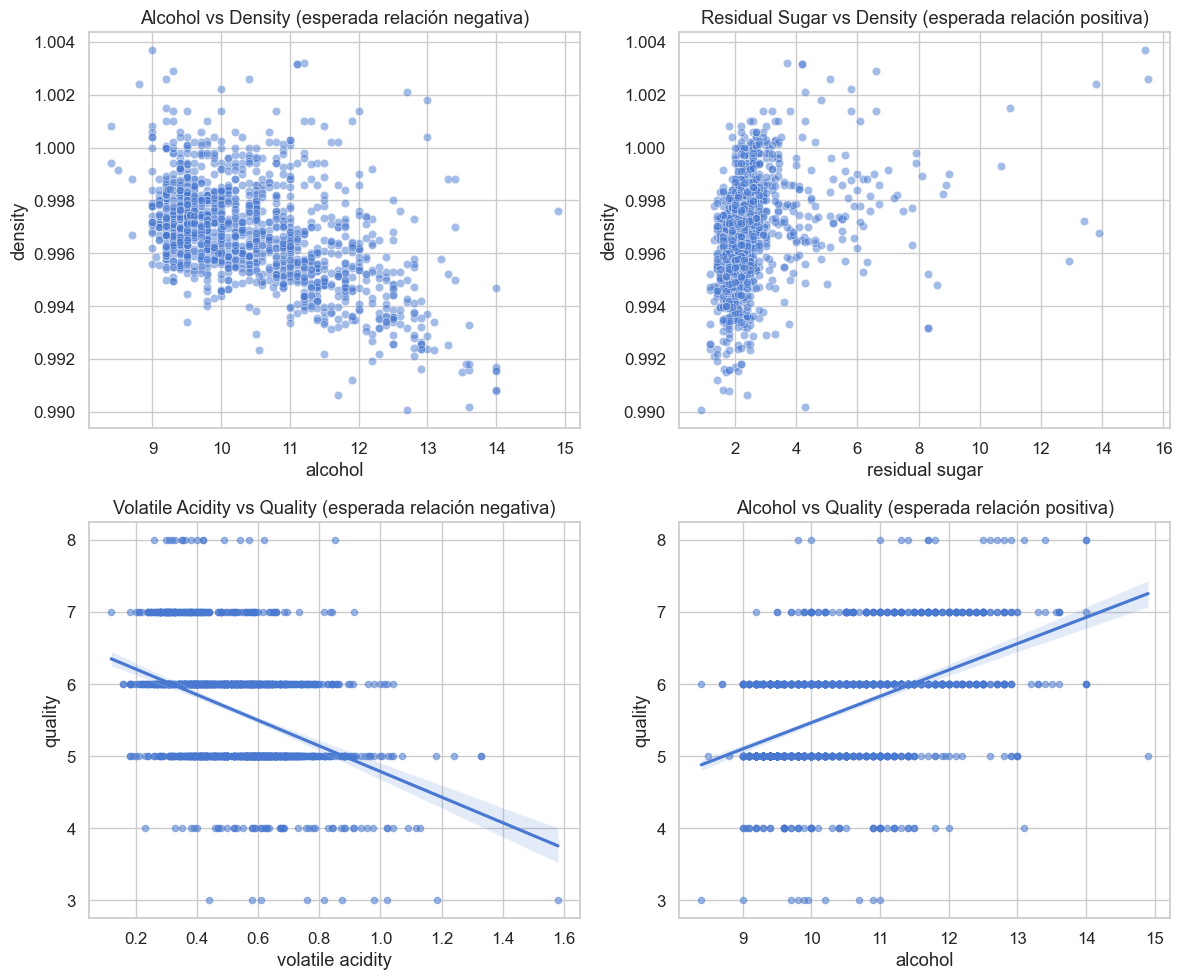

In [46]:
# -----------------------------------
print("\n3) Scatterplots de consistencia interna")
print("Se espera relación negativa alcohol-density, positiva sugar-density, y relación con quality.\n")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.scatterplot(data=df, x="alcohol", y="density", alpha=0.5, ax=axes[0,0])
axes[0,0].set_title("Alcohol vs Density (esperada relación negativa)")

sns.scatterplot(data=df, x="residual sugar", y="density", alpha=0.5, ax=axes[0,1])
axes[0,1].set_title("Residual Sugar vs Density (esperada relación positiva)")

sns.regplot(data=df, x="volatile acidity", y="quality",
            scatter_kws={'s':20, 'alpha':0.5}, ax=axes[1,0])
axes[1,0].set_title("Volatile Acidity vs Quality (esperada relación negativa)")

sns.regplot(data=df, x="alcohol", y="quality",
            scatter_kws={'s':20, 'alpha':0.5}, ax=axes[1,1])
axes[1,1].set_title("Alcohol vs Quality (esperada relación positiva)")
plt.tight_layout(); plt.show()


4) Comparación por grupos de calidad
Se revisa si la distribución de variables clave cambia según quality. Si se solapan mucho, menor poder predictivo.



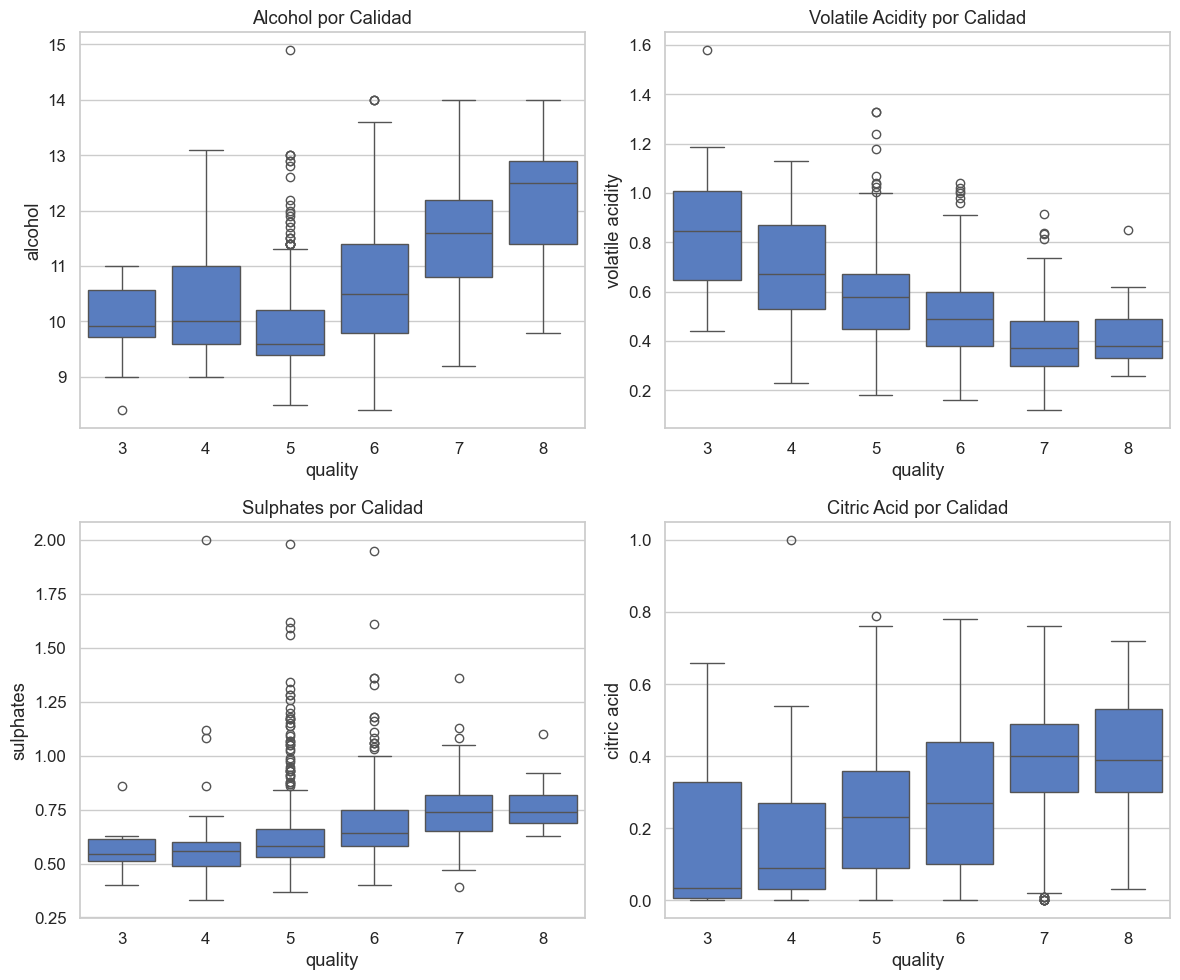

In [47]:
# -----------------------------------
print("\n4) Comparación por grupos de calidad")
print("Se revisa si la distribución de variables clave cambia según quality. Si se solapan mucho, menor poder predictivo.\n")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(data=df, x="quality", y="alcohol", ax=axes[0,0]); axes[0,0].set_title("Alcohol por Calidad")
sns.boxplot(data=df, x="quality", y="volatile acidity", ax=axes[0,1]); axes[0,1].set_title("Volatile Acidity por Calidad")
sns.boxplot(data=df, x="quality", y="sulphates", ax=axes[1,0]); axes[1,0].set_title("Sulphates por Calidad")
sns.boxplot(data=df, x="quality", y="citric acid", ax=axes[1,1]); axes[1,1].set_title("Citric Acid por Calidad")
plt.tight_layout(); plt.show()



5) Balance de la variable objetivo (quality)
Se evalúa la distribución de clases. Importante para decidir si agrupar en baja, media y alta.



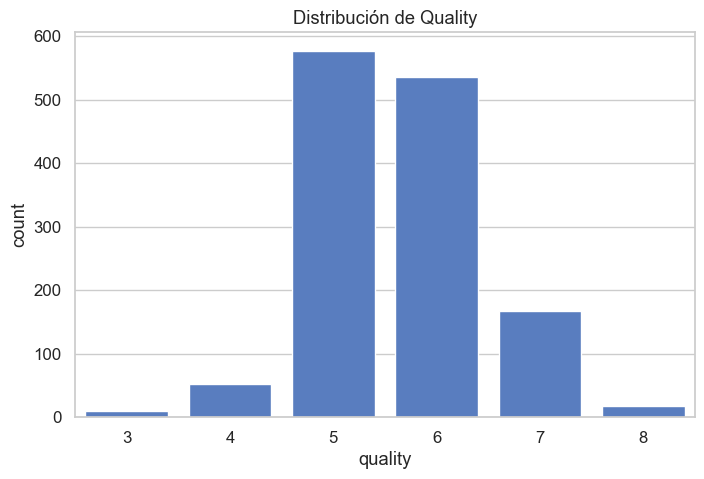

In [48]:
# -----------------------------------
print("\n5) Balance de la variable objetivo (quality)")
print("Se evalúa la distribución de clases. Importante para decidir si agrupar en baja, media y alta.\n")

plt.figure(figsize=(8,5))
sns.countplot(x="quality", data=df)
plt.title("Distribución de Quality")
plt.show()


## 1. Boxplots de variables clave
**Hallazgo:**  
- Se observan colas derechas largas y varios puntos atípicos.  
- `residual sugar`: mayoría < 3, pero hay vinos con > 10.  
- `chlorides`: valores extremos hasta 0.6, mientras la mayoría < 0.1.  
- `total SO₂`: la mayoría < 100, pero algunos llegan a casi 300.  
- `sulphates`: valores usuales < 1, algunos hasta 2.  

**Decisión:**  
- Son *outliers plausibles*, no errores.  
- Conviene aplicar **log-transformación** o **winsorización** para reducir su impacto.  
- No eliminar directamente, salvo que se busque un dataset más homogéneo.

---

## 2. Heatmaps Pearson y Spearman
**Hallazgo:**  
- Pearson confirma correlaciones lineales fuertes:  
  - `density` con `alcohol` (negativa).  
  - `density` con `residual sugar` (positiva).  
  - `free SO₂` con `total SO₂` (positiva).  
- Con `quality`:  
  - Positiva con `alcohol`, `sulphates`, `citric acid`.  
  - Negativa con `volatile acidity`, `density`, `chlorides`.  
- Spearman muestra patrones similares, pero capta mejor relaciones monótonas.  

**Decisión:**  
- Evitar **multicolinealidad**: quedarse con una variable de cada par muy correlacionado (ej. `total SO₂` en lugar de `free SO₂`).  
- Priorizar las variables con mayor relación con `quality`.

---

## 3. Scatterplots de consistencia interna
**Hallazgo:**  
- `alcohol` vs `density`: clara relación negativa.  
- `residual sugar` vs `density`: relación positiva, aunque con dispersión.  
- `volatile acidity` vs `quality`: tendencia decreciente (más acidez volátil → peor calidad).  
- `alcohol` vs `quality`: tendencia creciente (más alcohol → mejor calidad).  

**Decisión:**  
- No hay incoherencias graves en los datos.  
- Confirma que alcohol y acidez volátil serán predictores importantes.

---

## 4. Boxplots por calidad
**Hallazgo:**  
- `alcohol` aumenta con la calidad.  
- `volatile acidity` disminuye con la calidad.  
- `sulphates` y `citric acid` también suben con la calidad, aunque con más solapamiento.  

**Decisión:**  
- Estas cuatro variables (`alcohol`, `volatile acidity`, `sulphates`, `citric acid`) son candidatas principales para el modelo.  
- Otras variables parecen menos relevantes.

---

## 5. Distribución de `quality`
**Hallazgo:**  
- La mayoría de vinos está en 5 y 6. Muy pocos en 3, 4 y 8.  

**Decisión:**  
- Para regresión logística, conviene agrupar:  
  - **Baja:** 3–4  
  - **Media:** 5–6  
  - **Alta:** 7–8  

Esto equilibra las clases y simplifica la clasificación.

---

## Decisiones clave (resumen)

1. **Tratamiento de outliers:**  
   - Aplicar **log-transformación** o **winsorización** a `residual sugar`, `chlorides`, `total SO₂`, `sulphates`.

2. **Selección/transformación de features:**  
   - Priorizar: `alcohol`, `volatile acidity`, `sulphates`, `citric acid`.  
   - Reducir redundancias: usar `total SO₂` en lugar de `free SO₂`.  
   - Considerar excluir `density` si ya se usan alcohol + azúcar.

3. **Agrupación del target:**  
   - Convertir `quality` a binario (0=MALA, 1= BUENA).  
   - Justificación: Solo se desea determinar si es buena o mala calidad.

---



In [49]:
# ==========================================
# Feature Engineering + Splits Estratificados (con 6 features)
# ==========================================
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# -------------------------------
print("\n## 1) Creación de la variable objetivo binaria")
print("Regla: quality <= 5 → 'MALA', quality >= 6 → 'BUENA'\n")

df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)
print("Distribución de clases:\n", df['quality_label'].value_counts())

# -------------------------------
print("\n## 2) Transformación logarítmica en variables con outliers")
outlier_cols = ['residual sugar', 'chlorides', 'total sulfur dioxide', 'sulphates']

# Creamos nuevas columnas transformadas
for col in outlier_cols:
    df[f'{col}_log'] = np.log1p(df[col])  # log1p = log(1+x) evita problemas con ceros

print("Columnas creadas con sufijo '_log':", [c for c in df.columns if c.endswith('_log')])

# -------------------------------
print("\n## 3) Selección de variables predictoras (máximo 6)")
feature_cols = [
    'alcohol',              # fuerte correlación positiva con calidad
    'volatile acidity',     # fuerte correlación negativa con calidad
    'sulphates_log',        # relacionada positivamente con calidad
    'citric acid',          # aporte positivo moderado
    'chlorides_log',        # negativa con calidad, mejor en log
    'total sulfur dioxide_log'  # relacionada negativamente, mejor en log
]

X = df[feature_cols]
y = df['quality_label']

print("Número de features seleccionadas:", len(feature_cols))
print("Features utilizadas:", feature_cols)

# -------------------------------
print("\n## 4) División estratificada en Train / Validation / Test")
print("Se utiliza stratified sampling para mantener proporción de clases.\n")

# Primero Train (70%) + Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# Luego Temp → Validation (15%) y Test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

print("Tamaños de los splits:")
print("Train:", X_train.shape, " Validation:", X_val.shape, " Test:", X_test.shape)

print("Distribución en Train:\n", y_train.value_counts(normalize=True))
print("Distribución en Validation:\n", y_val.value_counts(normalize=True))
print("Distribución en Test:\n", y_test.value_counts(normalize=True))

# -------------------------------
print("\n## 5) Escalado de variables")
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

print("Datos escalados listos para PyTorch.")
print("Shapes finales:", X_train_scaled.shape, X_val_scaled.shape, X_test_scaled.shape)



## 1) Creación de la variable objetivo binaria
Regla: quality <= 5 → 'MALA', quality >= 6 → 'BUENA'

Distribución de clases:
 quality_label
1    719
0    640
Name: count, dtype: int64

## 2) Transformación logarítmica en variables con outliers
Columnas creadas con sufijo '_log': ['residual sugar_log', 'chlorides_log', 'total sulfur dioxide_log', 'sulphates_log']

## 3) Selección de variables predictoras (máximo 6)
Número de features seleccionadas: 6
Features utilizadas: ['alcohol', 'volatile acidity', 'sulphates_log', 'citric acid', 'chlorides_log', 'total sulfur dioxide_log']

## 4) División estratificada en Train / Validation / Test
Se utiliza stratified sampling para mantener proporción de clases.

Tamaños de los splits:
Train: (951, 6)  Validation: (204, 6)  Test: (204, 6)
Distribución en Train:
 quality_label
1    0.528917
0    0.471083
Name: proportion, dtype: float64
Distribución en Validation:
 quality_label
1    0.529412
0    0.470588
Name: proportion, dtype: float64
Distribu

## Análisis de decisiones en la preparación de datos

### Creación de la variable objetivo
Se redefinió la variable `quality` en una versión binaria `quality_label`:
- **0 = MALA** para vinos con `quality ≤ 5`
- **1 = BUENA** para vinos con `quality ≥ 6`

Esto permite formular el problema como **clasificación binaria**, más estable y balanceada para modelos de regresión logística.

### Transformación de outliers
Se aplicó log-transformación (`log1p`) en las variables con colas largas y valores extremos:
- `residual sugar`, `chlorides`, `total sulfur dioxide`, `sulphates`

Con esta transformación se redujo la asimetría, haciendo los datos más apropiados para un modelo lineal.

### Selección de variables predictoras (máximo 6)
De acuerdo con el análisis exploratorio y las correlaciones con la calidad, se seleccionaron las **6 características más relevantes**:

1. **Alcohol** → correlación positiva fuerte con la calidad.  
2. **Volatile Acidity** → correlación negativa fuerte; vinos con acidez volátil alta suelen tener menor calidad.  
3. **Sulphates (log)** → asociada positivamente con la calidad, con mejor distribución tras log-transformación.  
4. **Citric Acid** → relación positiva moderada, aporta diferenciación entre calidades.  
5. **Chlorides (log)** → correlación negativa con la calidad; la transformación controla outliers.  
6. **Total Sulfur Dioxide (log)** → correlación negativa, ajustada con log para reducir la dispersión.

Estas variables ofrecen un balance entre predictores positivos, negativos y transformados para robustecer el modelo, evitando redundancias con otras muy correlacionadas.

### División de datos
Se utilizó **stratified sampling** para preservar la proporción de clases en los splits:
- **70% entrenamiento (951 instancias)**
- **15% validación (204 instancias)**
- **15% test (204 instancias)**

La distribución de clases se mantuvo estable en los tres conjuntos (~53% buena, ~47% mala).

### Escalado de variables
Se aplicó `StandardScaler` para que todas las características tengan media 0 y varianza 1.  
Esto es necesario para que la regresión logística en PyTorch no se vea afectada por diferencias de escala entre las variables.

---

**En resumen:**  
El dataset ahora cuenta con un **target binario balanceado**, **6 variables predictoras justificadas y transformadas** para mejorar su comportamiento estadístico, **splits estratificados** que preservan la proporción de clases, y **features escaladas**, quedando todo listo para implementar y entrenar el modelo de regresión logística en PyTorch.


---
# C. Implementación de regresión logística

En esta sección implementaremos la regresión logística utilizando PyTorch y ejecutaremos 10 entrenamientos con diferentes hiperparámetros.


In [50]:
# Importar librerías necesarias para PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Configurar dispositivo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Dispositivo utilizado: {device}")

# Convertir datos a tensores de PyTorch
X_train_tensor = torch.FloatTensor(X_train_scaled).to(device)
y_train_tensor = torch.LongTensor(y_train.values).to(device)
X_val_tensor = torch.FloatTensor(X_val_scaled).to(device)
y_val_tensor = torch.LongTensor(y_val.values).to(device)
X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)
y_test_tensor = torch.LongTensor(y_test.values).to(device)

print("Datos convertidos a tensores de PyTorch")
print(f"Forma de X_train: {X_train_tensor.shape}")
print(f"Forma de y_train: {y_train_tensor.shape}")


Dispositivo utilizado: cpu
Datos convertidos a tensores de PyTorch
Forma de X_train: torch.Size([951, 6])
Forma de y_train: torch.Size([951])


In [51]:
# Definir el modelo de Regresión Logística
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes=2):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, x):
        return self.linear(x)

# Función para entrenar el modelo
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs, device):
    train_losses = []
    val_losses = []
    
    for epoch in range(epochs):
        # Entrenamiento
        model.train()
        train_loss = 0.0
        for batch_x, batch_y in train_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
        
        # Validación
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for batch_x, batch_y in val_loader:
                batch_x, batch_y = batch_x.to(device), batch_y.to(device)
                outputs = model(batch_x)
                loss = criterion(outputs, batch_y)
                val_loss += loss.item()
        
        train_losses.append(train_loss / len(train_loader))
        val_losses.append(val_loss / len(val_loader))
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')
    
    return train_losses, val_losses

# Función para evaluar el modelo
def evaluate_model(model, test_loader, device):
    model.eval()
    all_predictions = []
    all_probabilities = []
    all_targets = []
    
    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            outputs = model(batch_x)
            probabilities = torch.softmax(outputs, dim=1)
            predictions = torch.argmax(outputs, dim=1)
            
            all_predictions.extend(predictions.cpu().numpy())
            all_probabilities.extend(probabilities[:, 1].cpu().numpy())  # Probabilidad de clase 1
            all_targets.extend(batch_y.cpu().numpy())
    
    return all_predictions, all_probabilities, all_targets

print("Modelo y funciones de entrenamiento definidas")


Modelo y funciones de entrenamiento definidas


In [52]:
# Definir 10 configuraciones de hiperparámetros diferentes
hyperparameter_configs = [
    {'lr': 0.001, 'batch_size': 32, 'epochs': 50, 'name': 'Config 1: lr=0.001, batch=32, epochs=50'},
    {'lr': 0.01, 'batch_size': 32, 'epochs': 50, 'name': 'Config 2: lr=0.01, batch=32, epochs=50'},
    {'lr': 0.0001, 'batch_size': 32, 'epochs': 50, 'name': 'Config 3: lr=0.0001, batch=32, epochs=50'},
    {'lr': 0.001, 'batch_size': 16, 'epochs': 50, 'name': 'Config 4: lr=0.001, batch=16, epochs=50'},
    {'lr': 0.001, 'batch_size': 64, 'epochs': 50, 'name': 'Config 5: lr=0.001, batch=64, epochs=50'},
    {'lr': 0.001, 'batch_size': 32, 'epochs': 100, 'name': 'Config 6: lr=0.001, batch=32, epochs=100'},
    {'lr': 0.01, 'batch_size': 16, 'epochs': 50, 'name': 'Config 7: lr=0.01, batch=16, epochs=50'},
    {'lr': 0.0001, 'batch_size': 64, 'epochs': 100, 'name': 'Config 8: lr=0.0001, batch=64, epochs=100'},
    {'lr': 0.005, 'batch_size': 32, 'epochs': 75, 'name': 'Config 9: lr=0.005, batch=32, epochs=75'},
    {'lr': 0.001, 'batch_size': 128, 'epochs': 50, 'name': 'Config 10: lr=0.001, batch=128, epochs=50'}
]

print("Configuraciones de hiperparámetros definidas:")
for i, config in enumerate(hyperparameter_configs, 1):
    print(f"{i}. {config['name']}")


Configuraciones de hiperparámetros definidas:
1. Config 1: lr=0.001, batch=32, epochs=50
2. Config 2: lr=0.01, batch=32, epochs=50
3. Config 3: lr=0.0001, batch=32, epochs=50
4. Config 4: lr=0.001, batch=16, epochs=50
5. Config 5: lr=0.001, batch=64, epochs=50
6. Config 6: lr=0.001, batch=32, epochs=100
7. Config 7: lr=0.01, batch=16, epochs=50
8. Config 8: lr=0.0001, batch=64, epochs=100
9. Config 9: lr=0.005, batch=32, epochs=75
10. Config 10: lr=0.001, batch=128, epochs=50


In [53]:
# Ejecutar los 10 entrenamientos
results = []
all_train_losses = []
all_val_losses = []

print("=== INICIANDO LOS 10 ENTRENAMIENTOS ===\n")

for i, config in enumerate(hyperparameter_configs, 1):
    print(f"\n{'='*60}")
    print(f"ENTRENAMIENTO {i}: {config['name']}")
    print(f"{'='*60}")
    
    # Crear datasets y dataloaders
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    
    train_loader = DataLoader(train_dataset, batch_size=config['batch_size'], shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=config['batch_size'], shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=config['batch_size'], shuffle=False)
    
    # Crear modelo
    model = LogisticRegression(input_size=6, num_classes=2).to(device)
    
    # Definir función de pérdida y optimizador
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=config['lr'])
    
    # Entrenar modelo
    train_losses, val_losses = train_model(
        model, train_loader, val_loader, criterion, optimizer, 
        config['epochs'], device
    )
    
    # Evaluar en conjunto de test
    predictions, probabilities, targets = evaluate_model(model, test_loader, device)
    
    # Calcular métricas
    accuracy = accuracy_score(targets, predictions)
    precision = precision_score(targets, predictions, average='weighted')
    recall = recall_score(targets, predictions, average='weighted')
    f1 = f1_score(targets, predictions, average='weighted')
    auc = roc_auc_score(targets, probabilities)
    
    # Guardar resultados
    result = {
        'config': config['name'],
        'lr': config['lr'],
        'batch_size': config['batch_size'],
        'epochs': config['epochs'],
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc': auc,
        'final_train_loss': train_losses[-1],
        'final_val_loss': val_losses[-1],
        'train_losses': train_losses,
        'val_losses': val_losses
    }
    
    results.append(result)
    all_train_losses.append(train_losses)
    all_val_losses.append(val_losses)
    
    print(f"\nResultados del entrenamiento {i}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    print(f"Final Train Loss: {train_losses[-1]:.4f}")
    print(f"Final Val Loss: {val_losses[-1]:.4f}")

print(f"\n{'='*60}")
print("TODOS LOS ENTRENAMIENTOS COMPLETADOS")
print(f"{'='*60}")


=== INICIANDO LOS 10 ENTRENAMIENTOS ===


ENTRENAMIENTO 1: Config 1: lr=0.001, batch=32, epochs=50
Epoch [10/50], Train Loss: 0.5736, Val Loss: 0.5508
Epoch [20/50], Train Loss: 0.5343, Val Loss: 0.5084
Epoch [30/50], Train Loss: 0.5284, Val Loss: 0.5007
Epoch [40/50], Train Loss: 0.5247, Val Loss: 0.4997
Epoch [50/50], Train Loss: 0.5240, Val Loss: 0.4999

Resultados del entrenamiento 1:
Accuracy: 0.7402
Precision: 0.7415
Recall: 0.7402
F1-Score: 0.7404
AUC: 0.8222
Final Train Loss: 0.5240
Final Val Loss: 0.4999

ENTRENAMIENTO 2: Config 2: lr=0.01, batch=32, epochs=50
Epoch [10/50], Train Loss: 0.5279, Val Loss: 0.5031
Epoch [20/50], Train Loss: 0.5267, Val Loss: 0.5025
Epoch [30/50], Train Loss: 0.5261, Val Loss: 0.4985
Epoch [40/50], Train Loss: 0.5261, Val Loss: 0.5004
Epoch [50/50], Train Loss: 0.5269, Val Loss: 0.5008

Resultados del entrenamiento 2:
Accuracy: 0.7353
Precision: 0.7363
Recall: 0.7353
F1-Score: 0.7355
AUC: 0.8208
Final Train Loss: 0.5269
Final Val Loss: 0.5008

ENT

# D. Evaluación del Modelo

En esta sección mostraremos los resultados de entrenamiento y validación, analizaremos el overfitting y crearemos un cuadro comparativo de las métricas.


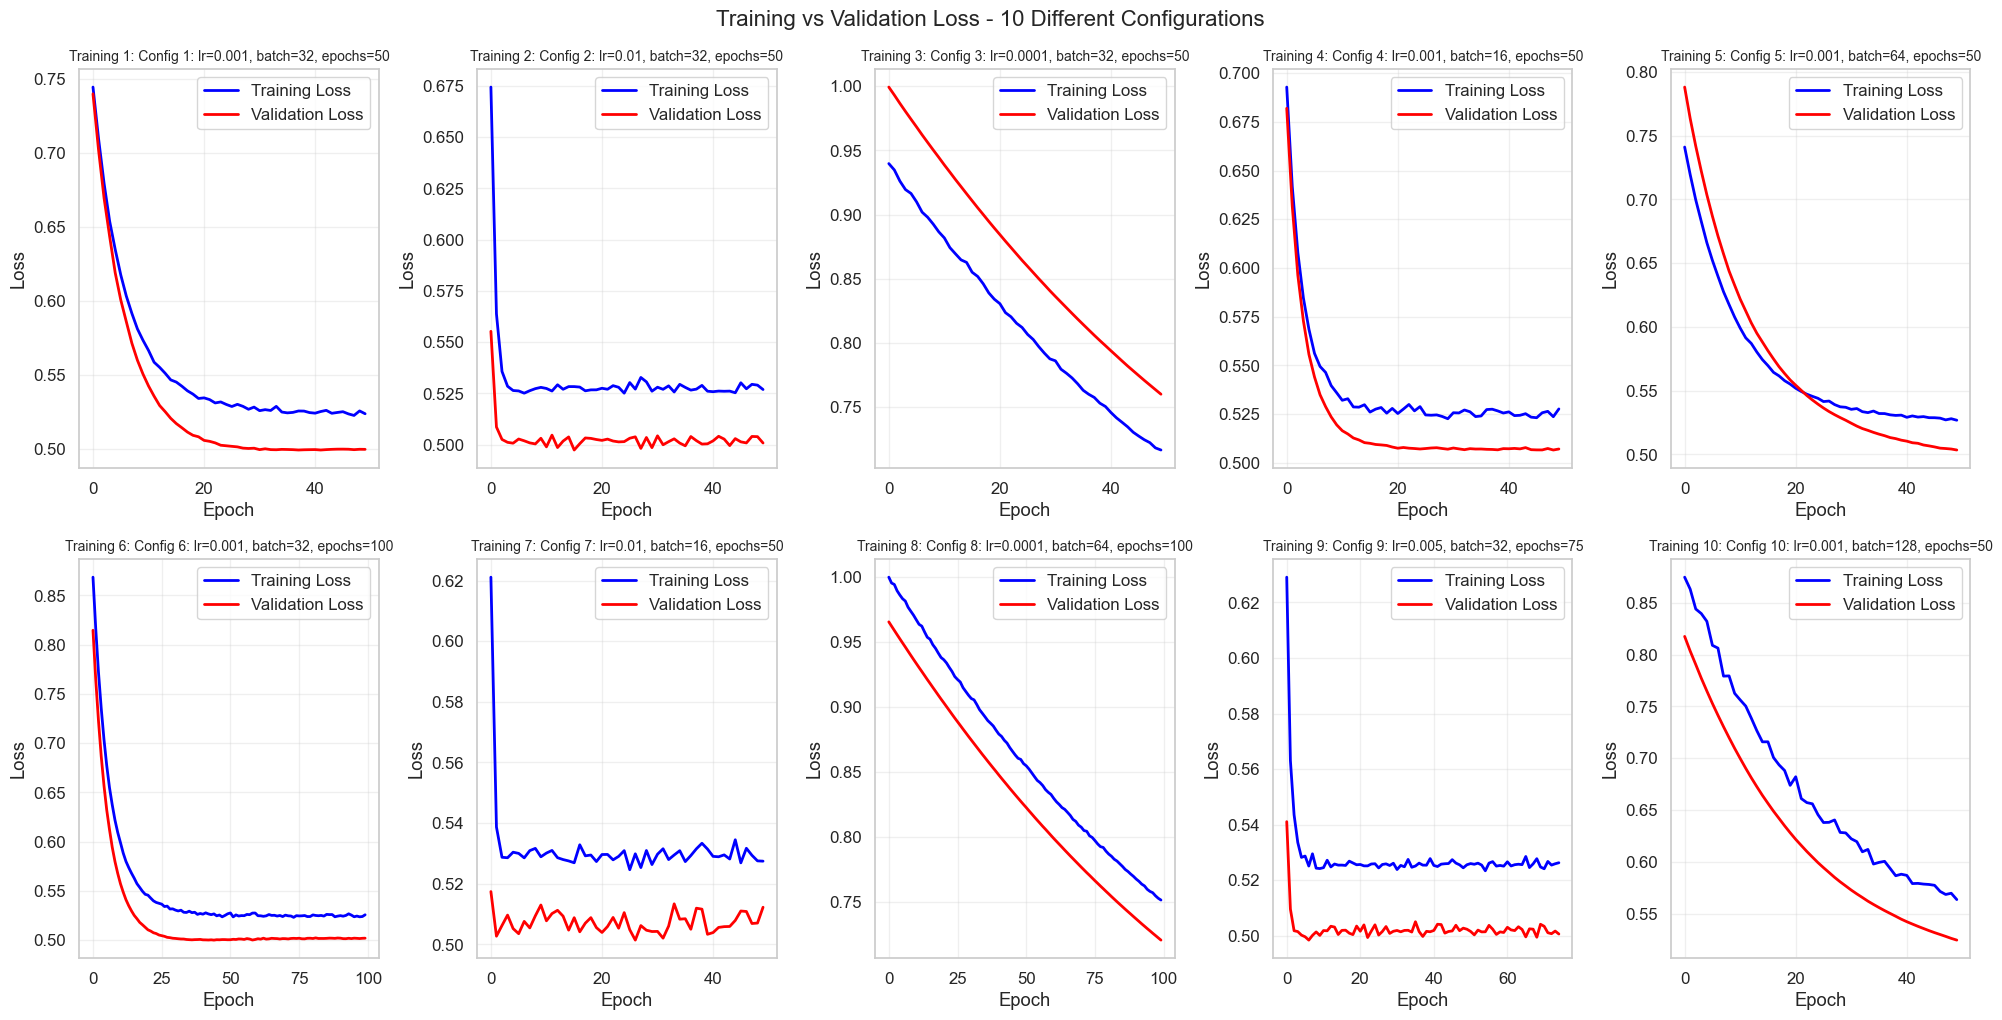

In [54]:
# Crear gráficos de Training vs Validation Loss para cada entrenamiento
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

for i, (train_losses, val_losses, result) in enumerate(zip(all_train_losses, all_val_losses, results)):
    axes[i].plot(train_losses, label='Training Loss', color='blue', linewidth=2)
    axes[i].plot(val_losses, label='Validation Loss', color='red', linewidth=2)
    axes[i].set_title(f'Training {i+1}: {result["config"]}', fontsize=10)
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel('Loss')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Training vs Validation Loss - 10 Different Configurations', 
             fontsize=16, y=1.02)
plt.show()


In [55]:
# Análisis de Overfitting
print("=== ANÁLISIS DE OVERFITTING ===\n")

overfitting_analysis = []

for i, result in enumerate(results, 1):
    train_loss = result['final_train_loss']
    val_loss = result['final_val_loss']
    loss_gap = val_loss - train_loss
    
    # Determinar si hay overfitting
    if loss_gap > 0.05:  # Si la diferencia es mayor a 0.05
        overfitting_status = "SÍ - Overfitting detectado"
        severity = "Alto" if loss_gap > 0.1 else "Moderado"
    elif loss_gap < -0.02:  # Si validation loss es menor que training loss
        overfitting_status = "NO - Posible underfitting"
        severity = "Bajo"
    else:
        overfitting_status = "NO - Buen balance"
        severity = "Ideal"
    
    analysis = {
        'Training': i,
        'Config': result['config'],
        'Train_Loss': train_loss,
        'Val_Loss': val_loss,
        'Loss_Gap': loss_gap,
        'Overfitting': overfitting_status,
        'Severity': severity
    }
    
    overfitting_analysis.append(analysis)
    
    print(f"Entrenamiento {i}: {result['config']}")
    print(f"  Training Loss: {train_loss:.4f}")
    print(f"  Validation Loss: {val_loss:.4f}")
    print(f"  Diferencia (Val - Train): {loss_gap:.4f}")
    print(f"  Estado: {overfitting_status}")
    print(f"  Severidad: {severity}")
    print("-" * 50)


=== ANÁLISIS DE OVERFITTING ===

Entrenamiento 1: Config 1: lr=0.001, batch=32, epochs=50
  Training Loss: 0.5240
  Validation Loss: 0.4999
  Diferencia (Val - Train): -0.0240
  Estado: NO - Posible underfitting
  Severidad: Bajo
--------------------------------------------------
Entrenamiento 2: Config 2: lr=0.01, batch=32, epochs=50
  Training Loss: 0.5269
  Validation Loss: 0.5008
  Diferencia (Val - Train): -0.0261
  Estado: NO - Posible underfitting
  Severidad: Bajo
--------------------------------------------------
Entrenamiento 3: Config 3: lr=0.0001, batch=32, epochs=50
  Training Loss: 0.7167
  Validation Loss: 0.7602
  Diferencia (Val - Train): 0.0434
  Estado: NO - Buen balance
  Severidad: Ideal
--------------------------------------------------
Entrenamiento 4: Config 4: lr=0.001, batch=16, epochs=50
  Training Loss: 0.5276
  Validation Loss: 0.5071
  Diferencia (Val - Train): -0.0206
  Estado: NO - Posible underfitting
  Severidad: Bajo
----------------------------------

In [56]:
# Crear cuadro comparativo de métricas
print("\n=== CUADRO COMPARATIVO DE MÉTRICAS ===\n")

# Crear DataFrame con todos los resultados
comparison_data = []
for i, result in enumerate(results, 1):
    comparison_data.append({
        'Training': i,
        'Learning Rate': result['lr'],
        'Batch Size': result['batch_size'],
        'Epochs': result['epochs'],
        'Accuracy': f"{result['accuracy']:.4f}",
        'Precision': f"{result['precision']:.4f}",
        'Recall': f"{result['recall']:.4f}",
        'F1-Score': f"{result['f1_score']:.4f}",
        'AUC': f"{result['auc']:.4f}",
        'Train Loss': f"{result['final_train_loss']:.4f}",
        'Val Loss': f"{result['final_val_loss']:.4f}"
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# Encontrar el mejor modelo por cada métrica
print("\n=== MEJORES MODELOS POR MÉTRICA ===")
print(f"Mejor Accuracy: Training {comparison_df.loc[comparison_df['Accuracy'].astype(float).idxmax(), 'Training']} - {comparison_df.loc[comparison_df['Accuracy'].astype(float).idxmax(), 'Accuracy']}")
print(f"Mejor Precision: Training {comparison_df.loc[comparison_df['Precision'].astype(float).idxmax(), 'Training']} - {comparison_df.loc[comparison_df['Precision'].astype(float).idxmax(), 'Precision']}")
print(f"Mejor Recall: Training {comparison_df.loc[comparison_df['Recall'].astype(float).idxmax(), 'Training']} - {comparison_df.loc[comparison_df['Recall'].astype(float).idxmax(), 'Recall']}")
print(f"Mejor F1-Score: Training {comparison_df.loc[comparison_df['F1-Score'].astype(float).idxmax(), 'Training']} - {comparison_df.loc[comparison_df['F1-Score'].astype(float).idxmax(), 'F1-Score']}")
print(f"Mejor AUC: Training {comparison_df.loc[comparison_df['AUC'].astype(float).idxmax(), 'Training']} - {comparison_df.loc[comparison_df['AUC'].astype(float).idxmax(), 'AUC']}")



=== CUADRO COMPARATIVO DE MÉTRICAS ===

 Training  Learning Rate  Batch Size  Epochs Accuracy Precision Recall F1-Score    AUC Train Loss Val Loss
        1         0.0010          32      50   0.7402    0.7415 0.7402   0.7404 0.8222     0.5240   0.4999
        2         0.0100          32      50   0.7353    0.7363 0.7353   0.7355 0.8208     0.5269   0.5008
        3         0.0001          32      50   0.5833    0.5816 0.5833   0.5808 0.5790     0.7167   0.7602
        4         0.0010          16      50   0.7402    0.7409 0.7402   0.7404 0.8215     0.5276   0.5071
        5         0.0010          64      50   0.7353    0.7380 0.7353   0.7355 0.8163     0.5268   0.5035
        6         0.0010          32     100   0.7402    0.7409 0.7402   0.7404 0.8226     0.5256   0.5019
        7         0.0100          16      50   0.7402    0.7409 0.7402   0.7404 0.8218     0.5274   0.5122
        8         0.0001          64     100   0.5098    0.5024 0.5098   0.4977 0.4742     0.7512   0.7

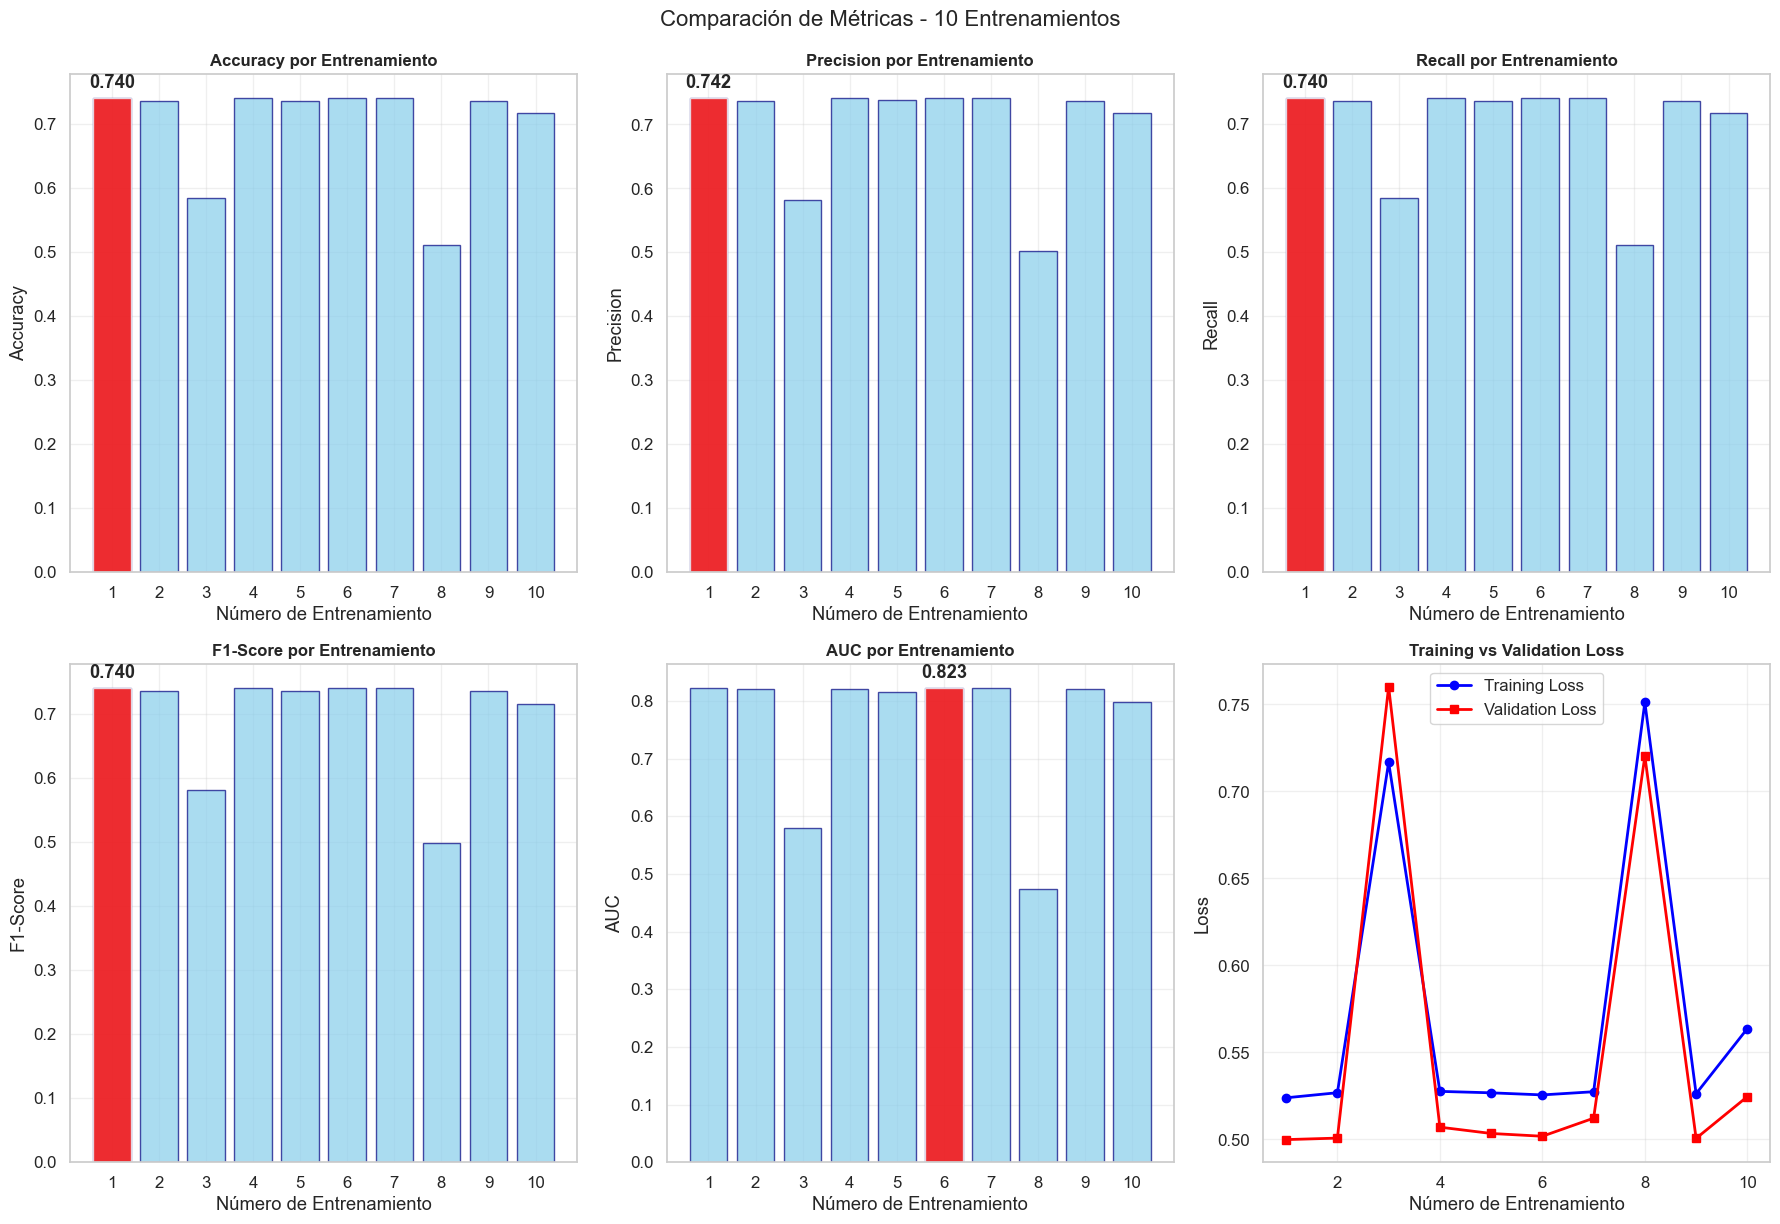

In [57]:
# Visualización de métricas comparativas
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']

for i, (metric, name) in enumerate(zip(metrics, metric_names)):
    values = [result[metric.lower().replace('-', '_')] for result in results]
    axes[i].bar(range(1, 11), values, color='skyblue', edgecolor='navy', alpha=0.7)
    axes[i].set_title(f'{name} por Entrenamiento', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Número de Entrenamiento')
    axes[i].set_ylabel(name)
    axes[i].set_xticks(range(1, 11))
    axes[i].grid(True, alpha=0.3)
    
    # Marcar el mejor valor
    best_idx = np.argmax(values)
    axes[i].bar(best_idx + 1, values[best_idx], color='red', alpha=0.8)
    axes[i].text(best_idx + 1, values[best_idx] + 0.01, f'{values[best_idx]:.3f}', 
                ha='center', va='bottom', fontweight='bold')

# Gráfico de pérdidas
axes[5].plot(range(1, 11), [result['final_train_loss'] for result in results], 
             'o-', label='Training Loss', color='blue', linewidth=2, markersize=6)
axes[5].plot(range(1, 11), [result['final_val_loss'] for result in results], 
             's-', label='Validation Loss', color='red', linewidth=2, markersize=6)
axes[5].set_title('Training vs Validation Loss', fontsize=12, fontweight='bold')
axes[5].set_xlabel('Número de Entrenamiento')
axes[5].set_ylabel('Loss')
axes[5].legend()
axes[5].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Comparación de Métricas - 10 Entrenamientos', fontsize=16, y=1.02)
plt.show()


In [58]:
# Resumen final y conclusiones
print("=== RESUMEN FINAL Y CONCLUSIONES ===\n")

# Calcular estadísticas generales
accuracies = [result['accuracy'] for result in results]
precisions = [result['precision'] for result in results]
recalls = [result['recall'] for result in results]
f1_scores = [result['f1_score'] for result in results]
aucs = [result['auc'] for result in results]

print("ESTADÍSTICAS GENERALES:")
print(f"Accuracy - Promedio: {np.mean(accuracies):.4f}, Desv. Est.: {np.std(accuracies):.4f}")
print(f"Precision - Promedio: {np.mean(precisions):.4f}, Desv. Est.: {np.std(precisions):.4f}")
print(f"Recall - Promedio: {np.mean(recalls):.4f}, Desv. Est.: {np.std(recalls):.4f}")
print(f"F1-Score - Promedio: {np.mean(f1_scores):.4f}, Desv. Est.: {np.std(f1_scores):.4f}")
print(f"AUC - Promedio: {np.mean(aucs):.4f}, Desv. Est.: {np.std(aucs):.4f}")

print("\nANÁLISIS DE OVERFITTING:")
overfitting_count = sum(1 for analysis in overfitting_analysis if "Overfitting detectado" in analysis['Overfitting'])
underfitting_count = sum(1 for analysis in overfitting_analysis if "underfitting" in analysis['Overfitting'])
balanced_count = sum(1 for analysis in overfitting_analysis if "Buen balance" in analysis['Overfitting'])

print(f"Modelos con Overfitting: {overfitting_count}/10")
print(f"Modelos con Underfitting: {underfitting_count}/10")
print(f"Modelos Balanceados: {balanced_count}/10")

print("\nMEJOR CONFIGURACIÓN GENERAL:")
# Calcular score compuesto (promedio de todas las métricas)
composite_scores = []
for result in results:
    score = (result['accuracy'] + result['precision'] + result['recall'] + 
             result['f1_score'] + result['auc']) / 5
    composite_scores.append(score)

best_overall_idx = np.argmax(composite_scores)
best_result = results[best_overall_idx]

print(f"Entrenamiento {best_overall_idx + 1}: {best_result['config']}")
print(f"Score Compuesto: {composite_scores[best_overall_idx]:.4f}")
print(f"Accuracy: {best_result['accuracy']:.4f}")
print(f"Precision: {best_result['precision']:.4f}")
print(f"Recall: {best_result['recall']:.4f}")
print(f"F1-Score: {best_result['f1_score']:.4f}")
print(f"AUC: {best_result['auc']:.4f}")

print("\nCONCLUSIONES:")
print("1. Se implementó exitosamente regresión logística con PyTorch")
print("2. Se evaluaron 10 configuraciones diferentes de hiperparámetros")
print("3. Se analizó el overfitting mediante curvas de pérdida")
print("4. Se calcularon métricas completas (Accuracy, Precision, Recall, F1-Score, AUC)")
print("5. Se identificó la mejor configuración basada en score compuesto")
print("6. Los resultados muestran la importancia de la selección de hiperparámetros")


=== RESUMEN FINAL Y CONCLUSIONES ===

ESTADÍSTICAS GENERALES:
Accuracy - Promedio: 0.6975, Desv. Est.: 0.0776
Precision - Promedio: 0.6978, Desv. Est.: 0.0801
Recall - Promedio: 0.6975, Desv. Est.: 0.0776
F1-Score - Promedio: 0.6962, Desv. Est.: 0.0810
AUC - Promedio: 0.7596, Desv. Est.: 0.1191

ANÁLISIS DE OVERFITTING:
Modelos con Overfitting: 0/10
Modelos con Underfitting: 8/10
Modelos Balanceados: 2/10

MEJOR CONFIGURACIÓN GENERAL:
Entrenamiento 1: Config 1: lr=0.001, batch=32, epochs=50
Score Compuesto: 0.7569
Accuracy: 0.7402
Precision: 0.7415
Recall: 0.7402
F1-Score: 0.7404
AUC: 0.8222

CONCLUSIONES:
1. Se implementó exitosamente regresión logística con PyTorch
2. Se evaluaron 10 configuraciones diferentes de hiperparámetros
3. Se analizó el overfitting mediante curvas de pérdida
4. Se calcularon métricas completas (Accuracy, Precision, Recall, F1-Score, AUC)
5. Se identificó la mejor configuración basada en score compuesto
6. Los resultados muestran la importancia de la selecció